使用XGBoost内置方式，导入iris数据完成分类问题

In [1]:
import xgboost as xgb
from xgboost import XGBClassifier
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [2]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold

In [3]:
from sklearn.datasets import load_iris

In [4]:
iris=load_iris()
X = iris.data
y = iris.target

In [5]:
iris.data

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [6]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=5)

In [8]:
xgb_model = XGBClassifier(n_jobs=-1)
xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=-1,
              nthread=None, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [9]:
y_pred = xgb_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 94.00%


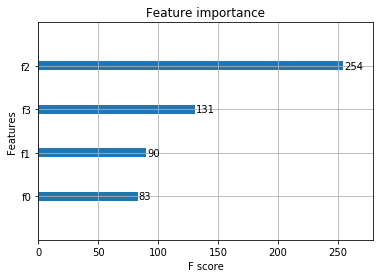

In [10]:
from xgboost import plot_importance
from matplotlib import pyplot
%matplotlib inline
plot_importance(xgb_model)
pyplot.show()

In [11]:
xgb_GS = XGBClassifier()
param_grid = dict(learning_rate=[0.0001,0.001,0.01,0.1,0.2,0.3,1,10,100], max_depth=[1,2,3,4,5,6,7])

In [13]:
import time

In [12]:
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=5)
grid_search = GridSearchCV(xgb_GS, param_grid=param_grid, scoring='neg_log_loss', n_jobs=-1, cv=kfold)
grid_result = grid_search.fit(X, y)

In [14]:
y_pred = grid_result.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 98.00%


In [15]:
grid_result.best_score_, grid_result.best_params_

(-0.16713944708928466, {'learning_rate': 0.1, 'max_depth': 1})

In [16]:
y_pred = grid_result.best_estimator_.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 98.00%


第二种调用xgboost的方法

In [17]:
from xgboost import plot_tree

In [33]:
parameters = {
    'eta': 0.1,
    'silent': True,  # option for logging
    'objective': 'multi:softprob',  # error evaluation for multiclass tasks
    'num_class': 3,  # number of classes to predic
    'max_depth': 18  # depth of the trees in the boosting process
}

In [34]:
xgb_model2 = xgb.train(parameters,xgb.DMatrix(X_train,label=y_train),num_boost_round=5,)

In [35]:
preds_proba = xgb_model2.predict(xgb.DMatrix(X_test, label=y_test))

In [36]:
preds = np.asarray([np.argmax(line) for line in preds_proba])
accuracy = accuracy_score(y_test, preds)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 98.00%


In [22]:
xgb_model2.get_dump()

['0:[f2<2.45000005] yes=1,no=2,missing=1\n\t1:leaf=0.422068983\n\t2:leaf=-0.217582449\n',
 '0:[f2<2.45000005] yes=1,no=2,missing=1\n\t1:leaf=-0.211034521\n\t2:[f3<1.75] yes=3,no=4,missing=3\n\t\t3:[f2<4.94999981] yes=5,no=6,missing=5\n\t\t\t5:leaf=0.400729954\n\t\t\t6:leaf=0.0719999969\n\t\t4:leaf=-0.209302351\n',
 '0:[f3<1.6500001] yes=1,no=2,missing=1\n\t1:[f2<4.94999981] yes=3,no=4,missing=3\n\t\t3:leaf=-0.217472136\n\t\t4:leaf=0.128571421\n\t2:leaf=0.400729954\n',
 '0:[f2<2.45000005] yes=1,no=2,missing=1\n\t1:leaf=0.29160437\n\t2:leaf=-0.19461371\n',
 '0:[f2<2.45000005] yes=1,no=2,missing=1\n\t1:leaf=-0.187714547\n\t2:[f3<1.75] yes=3,no=4,missing=3\n\t\t3:[f2<4.94999981] yes=5,no=6,missing=5\n\t\t\t5:leaf=0.277538329\n\t\t\t6:leaf=0.0653798133\n\t\t4:leaf=-0.186816469\n',
 '0:[f3<1.75] yes=1,no=2,missing=1\n\t1:[f2<4.94999981] yes=3,no=4,missing=3\n\t\t3:[f3<1.54999995] yes=5,no=6,missing=5\n\t\t\t5:leaf=-0.194026992\n\t\t\t6:leaf=0.0116719678\n\t\t4:leaf=0.0440503769\n\t2:leaf=0.2

In [23]:
xgb_model2.feature_names

['f0', 'f1', 'f2', 'f3']

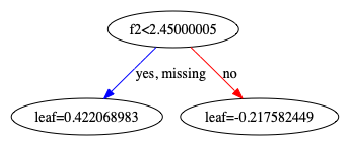

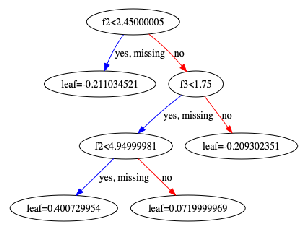

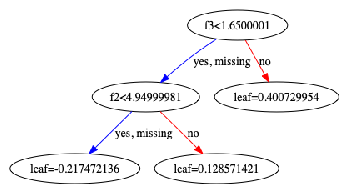

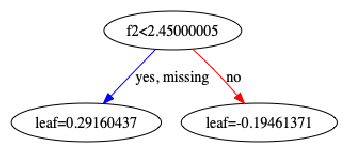

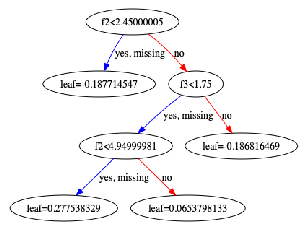

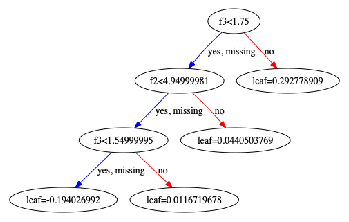

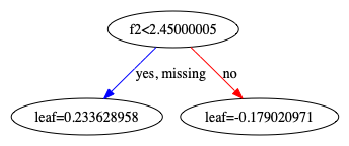

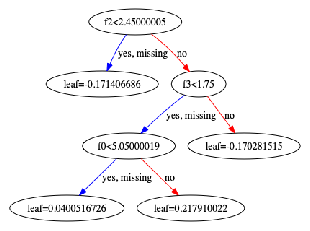

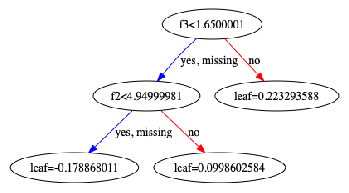

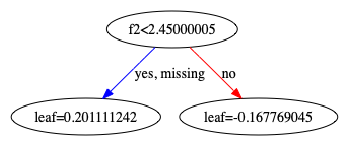

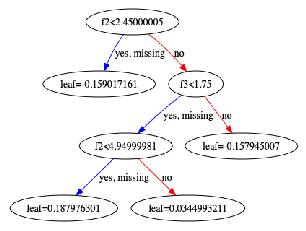

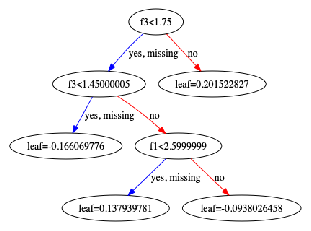

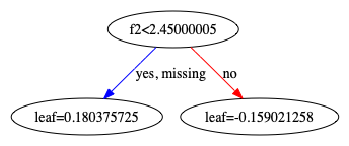

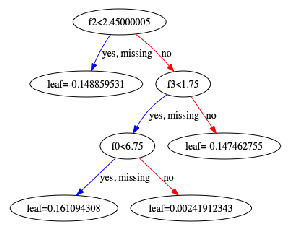

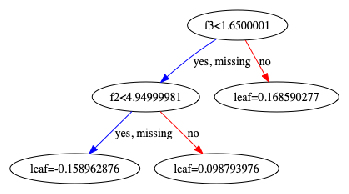

In [24]:
for i in range(0,15):
    plot_tree(xgb_model2,num_trees=i)